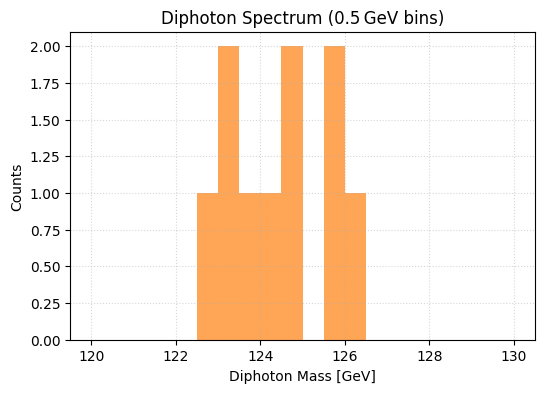

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

fig_dir = "../figures"
os.makedirs(fig_dir, exist_ok=True)

csv_path = "../data/diphoton.csv"
df = pd.read_csv(csv_path)


masses = df["M"]


plt.figure(figsize=(6,4))
narrow_bins = np.arange(120, 130.5, 0.5)  # 0.5 GeV bins from 120 to 130 GeV
plt.hist(masses, bins=narrow_bins, histtype="stepfilled", alpha=0.7, color="C1")
plt.xlabel("Diphoton Mass [GeV]")
plt.ylabel("Counts")
plt.title("Diphoton Spectrum (0.5 GeV bins)")
plt.grid(linestyle=":", alpha=0.5)

out_path_hr = os.path.join(fig_dir, "mass_diphoton_highres.png")
plt.savefig(out_path_hr, dpi=300, bbox_inches="tight")


plt.show()



In [4]:
import numpy as np

bins = np.linspace(110, 140, 11)
print("Bin edges:", bins)
# prints: [110. 113. 116. 119. 122. 125. 128. 131. 134. 137. 140.]

Bin edges: [110. 113. 116. 119. 122. 125. 128. 131. 134. 137. 140.]


μ = 124.35 GeV, σ = 1.57 GeV


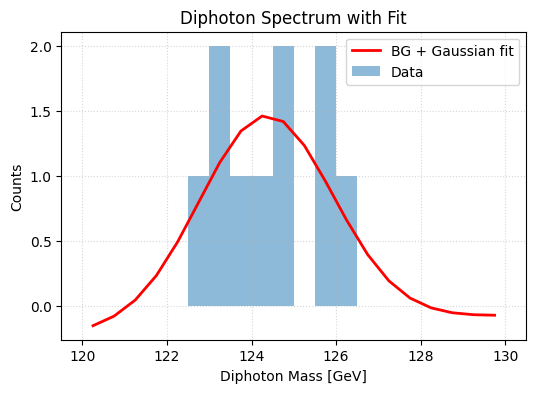

In [11]:
import numpy as np
from scipy.optimize import curve_fit

counts, edges = np.histogram(masses, bins=narrow_bins)
centers = 0.5*(edges[:-1] + edges[1:])


def model(x, Abg, Bbg, Asig, mu, sigma):
    bg = Abg * np.exp(-Bbg * x)
    sig = Asig * np.exp(-0.5*((x - mu)/sigma)**2) / (sigma * np.sqrt(2*np.pi))
    return bg + sig


p0 = [50, 0.01, 20, 125, 1]


popt, pcov = curve_fit(model, centers, counts, p0=p0)


Abg, Bbg, Asig, mu_fit, sigma_fit = popt
print(f"μ = {mu_fit:.2f} GeV, σ = {sigma_fit:.2f} GeV")


fit_vals = model(centers, *popt)


plt.figure(figsize=(6,4))
plt.bar(centers, counts, width=centers[1]-centers[0], alpha=0.5, label="Data")
plt.plot(centers, fit_vals, 'r-', lw=2, label="BG + Gaussian fit")
plt.xlabel("Diphoton Mass [GeV]")
plt.ylabel("Counts")
plt.title("Diphoton Spectrum with Fit")
plt.legend()
plt.grid(linestyle=":", alpha=0.5)
plt.savefig("../figures/mass_fit.png", dpi=150, bbox_inches="tight")
plt.show()


In [12]:
print(f"Fitted Higgs mass μ = {mu_fit:.2f} GeV")
print(f"Fitted width σ = {sigma_fit:.2f} GeV")


Fitted Higgs mass μ = 124.35 GeV
Fitted width σ = 1.57 GeV
